# Finite-Difference Approximations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cleaner import cleaner
from sympy import Derivative as D
from sympy import Eq, Function, Matrix, O, cos, solve, symbols
from tabulate import tabulate

In [2]:
x = symbols("x")
h = symbols("h", positive=True)
f = Function("f")

## Forward Taylor Series

In [3]:
f(x + h).series(x=h, x0=0, n=5).simplify()

f(x) + h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 + h**3*Derivative(f(x), (x, 3))/6 + h**4*Derivative(f(x), (x, 4))/24 + O(h**5)

## Backward Taylor Series

In [4]:
f(x - h).series(x=h, x0=0, n=5).simplify()

f(x) - h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 - h**3*Derivative(f(x), (x, 3))/6 + h**4*Derivative(f(x), (x, 4))/24 + O(h**5)

## Truncation error

In [5]:
cos(x + h).series(x=h, x0=0, n=2).removeO().simplify()

-h*sin(x) + cos(x)

In [6]:
x = 0
h = 0.1
exact = np.cos(x + h)
first_order_approximation = np.cos(x) - h * np.sin(x)
truncation_error = np.abs(exact - first_order_approximation)
E_h = np.abs(-(np.power(h, 2)) / 2 * np.cos(x))

In [7]:
truncation_error

0.0049958347219741794

In [8]:
E_h

0.005000000000000001

In [9]:
error = np.abs(truncation_error - E_h)

In [10]:
error

4.165278025821534e-06

#### Plot

In [11]:
h = np.flip(np.reciprocal(2 ** np.arange(1, 5).astype(float)))

In [12]:
h

array([0.0625, 0.125 , 0.25  , 0.5   ])

In [13]:
x = 1
error_truncation = np.abs(np.cos(x + h) - (np.cos(x) - h * np.sin(x)))

In [14]:
error_truncation

array([0.0010207 , 0.00394192, 0.0146122 , 0.04882961])

In [15]:
h_values = np.linspace(start=0, stop=h.max())
E_h = np.abs(-1 / 2 * h_values**2 * np.cos(x))

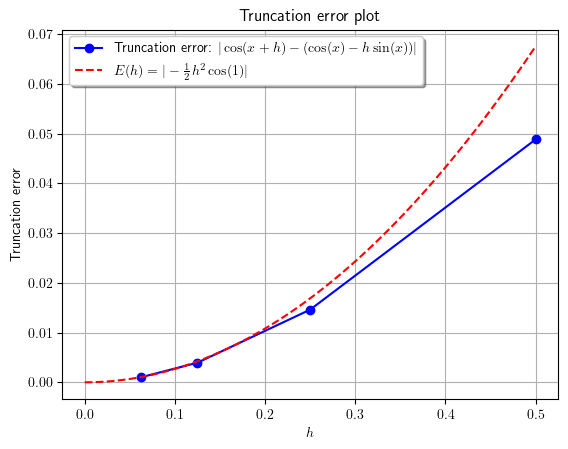

In [16]:
fig, ax = plt.subplots()
ax.plot(
    h,
    error_truncation,
    "bo-",
    label=r"Truncation error: $|\cos(x+h) - (\cos(x) - h\sin(x))|$",
)
ax.plot(h_values, E_h, "r--", label=r"$E(h)=|-\frac{1}{2}h^2\cos(1)|$")
ax.set_xlabel(r"$h$")
ax.set_ylabel(r"Truncation error")
ax.set_title("Truncation error plot")
ax.grid()
legend = ax.legend(loc="best", shadow=True)

## Properties of $O\left(h^{n}\right)$

In [17]:
h = symbols("h")
m, n, k = (5, 2, -2)
assert m > n
k * O(h**n) == O(h**n)

True

In [18]:
O(h**m) + O(h**n) == O(h**n)

True

In [19]:
m, n = (2, 5)
assert m < n
O(h**n) / h**m == O(h ** (n - m))

True

## Deriving finite-difference approximations

In [20]:
x = symbols("x")
h = symbols("h", positive=True)
f = Function("f")

In [21]:
Eq(f(x + h), f(x + h).series(x=h, x0=0, n=2).simplify())

Eq(f(h + x), f(x) + h*Derivative(f(x), x) + O(h**2))

In [22]:
Eq(f(x - h), f(x - h).series(x=h, x0=0, n=2).simplify())

Eq(f(-h + x), f(x) - h*Derivative(f(x), x) + O(h**2))

In [23]:
Eq(f(x + h), f(x + h).series(x=h, x0=0, n=3).simplify())

Eq(f(h + x), f(x) + h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 + O(h**3))

In [24]:
Eq(f(x - h), f(x - h).series(x=h, x0=0, n=3).simplify())

Eq(f(-h + x), f(x) - h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 + O(h**3))

In [25]:
Eq(f(x + h), f(x + h).series(x=h, x0=0, n=4).simplify())

Eq(f(h + x), f(x) + h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 + h**3*Derivative(f(x), (x, 3))/6 + O(h**4))

In [26]:
Eq(f(x - h), f(x - h).series(x=h, x0=0, n=4).simplify())

Eq(f(-h + x), f(x) - h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 - h**3*Derivative(f(x), (x, 3))/6 + O(h**4))

### First-order forward difference

In [27]:
_ = f(x + h).series(x=h, x0=0, n=2).removeO().simplify()
Eq(D(f(x)), solve(Eq(_, f(x + h)), D(f(x)))[0])

Eq(Derivative(f(x), x), (-f(x) + f(h + x))/h)

### First-order backward difference

In [28]:
_ = f(x - h).series(x=h, x0=0, n=2).removeO().simplify()
Eq(D(f(x)), solve(Eq(_, f(x - h)), D(f(x)))[0])

Eq(Derivative(f(x), x), (f(x) - f(-h + x))/h)

### Second-order symmetric difference

In [29]:
_ = f(x + h).series(x=h, x0=0, n=4).removeO().simplify()

In [30]:
__ = f(x - h).series(x=h, x0=0, n=4).removeO().simplify()

In [31]:
Eq(D(f(x), x, 2), solve(Eq(_ + __, f(x + h) + f(x - h)), D(f(x), x, 2))[0])

Eq(Derivative(f(x), (x, 2)), (-2*f(x) + f(-h + x) + f(h + x))/h**2)

In [32]:
cleaner(["x", "h", "f"])

Symbolic variables already cleared


## Example $3$

In [33]:
def forward_first_derivative(f: np.ufunc, x_0: float, h: np.array):
    return (f(x_0 + h) - f(x_0)) / h

In [34]:
def backward_first_derivative(f: np.ufunc, x_0: float, h: np.array):
    return (f(x_0) - f(x_0 - h)) / h

In [35]:
def central_first_derivative(f: np.ufunc, x_0: float, h: np.array):
    return (f(x_0 + h) - f(x_0 - h)) / (2 * h)

In [36]:
def central_second_derivative(f: np.ufunc, x_0: float, h: np.array):
    return (f(x_0 + h) - 2 * f(x_0) + f(x_0 - h)) / h**2

In [37]:
f = np.cos
f_prime = lambda x: -np.sin(x)
f_prime_prime = lambda x: -np.cos(x)
x_0 = np.pi / 4
h = np.array(0.1)

In [38]:
ffd = forward_first_derivative(f=f, x_0=x_0, h=h)

In [39]:
ffd

-0.741254745095894

In [40]:
bfd = backward_first_derivative(f=f, x_0=x_0, h=h)

In [41]:
bfd

-0.6706029729039886

In [42]:
cfd = central_first_derivative(f=f, x_0=x_0, h=h)

In [43]:
cfd

-0.7059288589999413

In [44]:
exact_first_derivative = f_prime(x_0)

In [45]:
exact_first_derivative

-0.7071067811865475

In [46]:
error_ffd = np.abs(exact_first_derivative - ffd)

In [47]:
error_ffd

0.03414796390934649

In [48]:
error_bfd = np.abs(exact_first_derivative - bfd)

In [49]:
error_bfd

0.036503808282558836

In [50]:
error_cfd = np.abs(exact_first_derivative - cfd)

In [51]:
error_cfd

0.0011779221866061729

In [52]:
csd = central_second_derivative(f=f, x_0=x_0, h=h)

In [53]:
csd

-0.7065177219190532

In [54]:
exact_second_derivative = f_prime_prime(x_0)

In [55]:
exact_second_derivative

-0.7071067811865476

In [56]:
error_csd = np.abs(exact_second_derivative - csd)

In [57]:
error_csd

0.0005890592674944184

## Estimating the order of an approximation

$$
n\approx
\dfrac{\log\left|E\left(h_{\max}\right)\right| -\log\left|E\left(h_{\min}\right)\right|}{
\log\left(h_{\max}\right)-\log\left(h_{\min}\right)
}.
$$

In [58]:
def estimate_order(h: np.array, truncation_error: np.array) -> float:
    assert h.size == truncation_error.size
    h_max = h.max()
    h_min = h.min()
    Eh_max = truncation_error[np.argmax(h, axis=0)[0]][0]
    Eh_min = truncation_error[np.argmin(h, axis=0)[0]][0]

    return (np.log(np.abs(Eh_max)) - np.log(np.abs(Eh_min))) / (
        np.log(h_max) - np.log(h_min)
    )

## Table 2.1

Finite-difference approximations of the first derivative of
$f\left(x\right)=\cos\left(x\right)$ at $x=\dfrac{\pi}{4}$ using
step lengths $h\in\left\{0.1,0.05,0.25,0.0125\right\}$.

In [59]:
f = np.cos
f_prime = lambda x: -np.sin(x)
x_0 = np.pi / 4
h = np.reciprocal(10 * (2 ** np.arange(4).astype(float)))[np.newaxis].T

In [60]:
h

array([[0.1   ],
       [0.05  ],
       [0.025 ],
       [0.0125]])

In [61]:
forward = forward_first_derivative(f=f, x_0=x_0, h=h)
backward = backward_first_derivative(f=f, x_0=x_0, h=h)
central = central_first_derivative(f=f, x_0=x_0, h=h)

In [62]:
tabular = np.concatenate((h, forward, backward, central), axis=1)
header = ["h", "Forward", "Backward", "Central"]

In [63]:
print(tabulate(tabular_data=tabular, headers=header))  # TODO: As xarray.

     h    Forward    Backward    Central
------  ---------  ----------  ---------
0.1     -0.741255   -0.670603  -0.705929
0.05    -0.724486   -0.689138  -0.706812
0.025   -0.715872   -0.698195  -0.707033
0.0125  -0.711508   -0.702669  -0.707088


In [64]:
f_prime(x_0)

-0.7071067811865475

In [65]:
error_forward = np.abs(f_prime(x_0) - forward)
error_backward = np.abs(f_prime(x_0) - backward)
error_central = np.abs(f_prime(x_0) - central)

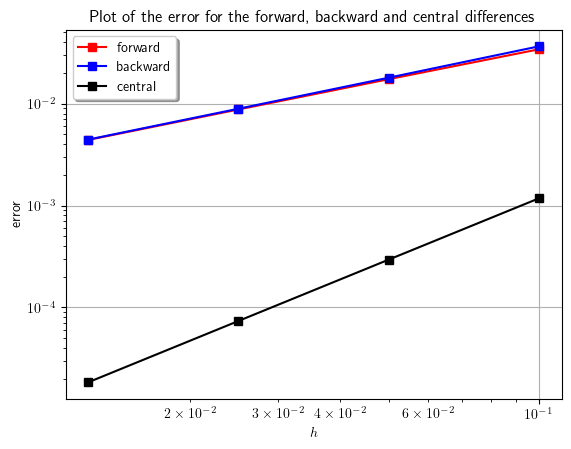

In [66]:
fig, ax = plt.subplots()
ax.loglog(h, error_forward, "rs-", label="forward")
ax.loglog(h, error_backward, "bs-", label="backward")
ax.loglog(h, error_central, "ks-", label="central")
ax.set_xlabel(r"$h$")
ax.set_ylabel(r"error")
ax.set_title("Plot of the error for the forward, backward and central differences")
ax.grid()
legend = ax.legend(loc="best", shadow=True)

## Table 2.2

Truncation errors for the Taylor series approximations of
$\cos\left(1+h\right)$ for $h\in\left\{0.5,0.25,0.125,0.0625\right\}$.

In [67]:
f = lambda h: np.cos(1 + h)
f_prime = lambda h: -np.sin(1 + h)
x_0 = 1
h = np.reciprocal(2 ** np.arange(1, 5).astype(float))[np.newaxis].T

In [68]:
h

array([[0.5   ],
       [0.25  ],
       [0.125 ],
       [0.0625]])

In [69]:
forward = forward_first_derivative(f=f, x_0=x_0, h=h)
backward = backward_first_derivative(f=f, x_0=x_0, h=h)
central = central_first_derivative(f=f, x_0=x_0, h=h)

In [70]:
error_forward = np.abs(f_prime(x_0) - forward)
error_backward = np.abs(f_prime(x_0) - backward)
error_central = np.abs(f_prime(x_0) - central)

In [71]:
tabular = np.concatenate((h, error_forward, error_backward, error_central), axis=1)
header = ["h", "Forward error", "Backward error", "Central error"]

In [72]:
print(tabulate(tabular_data=tabular, headers=header))

     h    Forward error    Backward error    Central error
------  ---------------  ----------------  ---------------
0.5           0.139304          0.0644706      0.0374166
0.25          0.0611903         0.0423057      0.00944229
0.125         0.0283414         0.0236092      0.00236611
0.0625        0.0135922         0.0124085      0.000591875


In [73]:
estimate_order(h, error_forward)

1.1191270541574243

In [74]:
estimate_order(h, error_backward)

0.7924386666069776

In [75]:
estimate_order(h, error_central)

1.9940809174948577

## Finite-difference approximations of mixed derivatives

In [76]:
0

0

## Deriving finite-difference formulae using the method of undetermined coeffients

## Example 4

In [77]:
h = symbols("h")

In [78]:
A = Matrix([[1, 1, 1], [0, 1, 2], [0, 1 / 2, 2]])
b = Matrix([0, 1 / h, 0])

In [79]:
A

Matrix([
[1,   1, 1],
[0,   1, 2],
[0, 0.5, 2]])

In [80]:
b

Matrix([
[  0],
[1/h],
[  0]])

In [81]:
A.solve(b)

Matrix([
[-1.5/h],
[ 2.0/h],
[-0.5/h]])

## Example of a finite difference scheme

Let $U\left(t,x\right)$ the concentration of some substance and $v$ is the speed that the substance travels
along $a\leq x\leq b$.

$$
\begin{cases}
U_{t}+v U_{x}=0
 & \text { for }a\leq x\leq b, t>0. \\
U
\left(0, x\right)=
f\left(x\right)
 & \text { for }a\leq x\leq b. \\
U
\left(t, a\right)=
U\left(t, b\right)=0
 & \text { for }t>0. \\
\end{cases}
$$

In a uniform grid, the $i$-th node in the grid is located at $x_{i}=a+i\Delta x$.

$$
\Delta x=
\dfrac{b-a}{N-1}.
$$

$$
\begin{aligned}
\dfrac{U^{n+1}_{i}-U^{n}_{i}}{\Delta t}+
v\dfrac{U^{n}_{i}-U^{n}_{i-1}}{\Delta x}
&=0.\\
U^{n+1}_{i}
&=
U^{n}_{i}-
\dfrac{v\Delta t}{\Delta x}
\left(U^{n}_{i}-U^{n}_{i-1}\right).
\end{aligned}
$$

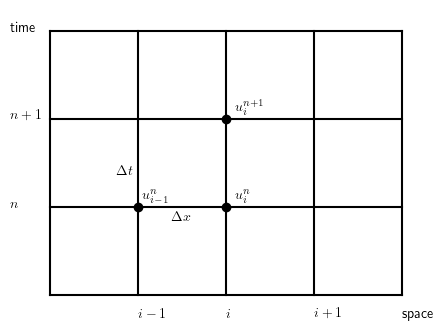

In [82]:
fig = plt.figure(figsize=(5, 4))
for i in range(4):
    plt.plot((0, 4), (i, i), "k")
for j in range(5):
    plt.plot((j, j), (0, 3), "k")
plt.plot(2, 2, "ko")
plt.plot(2, 1, "ko")
plt.plot(1, 1, "ko")
ax = fig.gca()
ax.axis("off")
ax.axis("equal")
plt.text(1, -0.25, "$i-1$")
plt.text(2, -0.25, "$i$")
plt.text(3, -0.25, "$i+1$")
plt.text(1.38, 0.85, r"$\Delta x$")
plt.text(2.1, 1.1, "$u^n_i$")
plt.text(2.1, 2.1, "$u^{n+1}_i$")
plt.text(1.05, 1.1, "$u^{n}_{i-1}$")
plt.text(0.75, 1.38, r"$\Delta t$")
plt.text(-0.45, 1, "$n$")
plt.text(-0.45, 2, "$n+1$")
plt.text(-0.45, 3, "time")
plt.text(4, -0.25, "space");

In [84]:
N = 11  # number of nodes
number_iterations = 3
x, dx = np.linspace(start=0, stop=1, num=N, retstep=True)  # node positions
v = 1  # speed
dt = 0.05  # time step
t = 0  # initial value of t

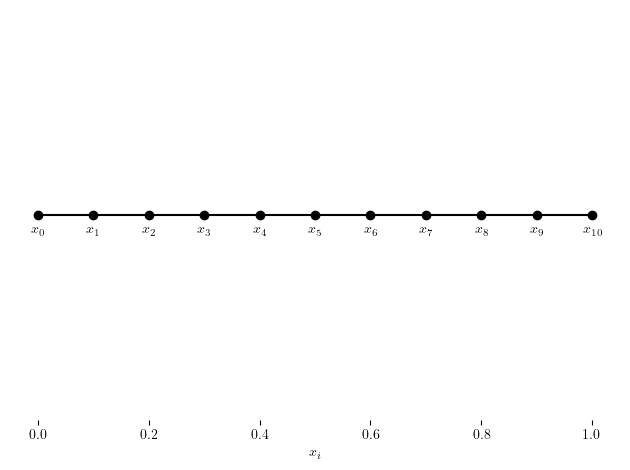

In [85]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)
ax.plot(x, np.zeros_like(x), "ko-")
ax.set_xlabel(r"$x_{i}$")
for i, xi in enumerate(x):
    ax.text(xi, -0.005, rf"$x_{{{i}}}$", ha="center")
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

In [86]:
C = v * dt / dx

In [87]:
U = np.empty((number_iterations + 1, x.size))
U[0, :] = np.exp(-100 * np.power(x - 0.4, 2))  # initial conditions
U[0, 0], U[0, -1] = (0, 0)

In [88]:
for n in range(number_iterations):
    U[n + 1, 0], U[n + 1, -1] = (0, 0)  # boundary nodes
    for i in range(x.size):
        U[n + 1, i] = U[n, i] - C * (U[n, i] - U[n, i - 1])

In [89]:
# Values of the first three iterations of the FDS used to solve the advection equation
tabular = np.hstack(
    (
        np.array(["i", "x_i", "u^0_i", "u^1_i", "u^2_i", "u^3_i"])[np.newaxis].T,
        np.vstack((np.arange(x.size)[np.newaxis], x, U)),
    )
)
print(tabulate(tabular, floatfmt=".4f"))

-----  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  -------
i      0.0000  1.0000  2.0000  3.0000  4.0000  5.0000  6.0000  7.0000  8.0000  9.0000  10.0000
x_i    0.0000  0.1000  0.2000  0.3000  0.4000  0.5000  0.6000  0.7000  0.8000  0.9000   1.0000
u^0_i  0.0000  0.0001  0.0183  0.3679  1.0000  0.3679  0.0183  0.0001  0.0000  0.0000   0.0000
u^1_i  0.0000  0.0001  0.0092  0.1931  0.6839  0.6839  0.1931  0.0092  0.0001  0.0000   0.0000
u^2_i  0.0000  0.0000  0.0046  0.1012  0.4385  0.6839  0.4385  0.1012  0.0046  0.0000   0.0000
u^3_i  0.0000  0.0000  0.0023  0.0529  0.2698  0.5612  0.5612  0.2698  0.0529  0.0023   0.0000
-----  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  -------


In [90]:
with np.printoptions(precision=5, suppress=True):
    print(np.array([np.pi]))

[3.14159]
